# MODS 205

## Question 3

### 1

In [2]:
import pandas as pd
import numpy as np

# Load each dataset
bnppa_df = pd.read_csv('C:/Users/PC2/Downloads/BNP.PA.csv')
mc_df = pd.read_csv('C:/Users/PC2/Downloads/MC.PA.csv')
fchi_df = pd.read_csv('C:/Users/PC2/Downloads/^FCHI.csv')
irx_df = pd.read_csv('C:/Users/PC2/Downloads/^IRX.csv')

# Convert the 'Date' column to datetime and sort each dataframe by date
bnppa_df['Date'] = pd.to_datetime(bnppa_df['Date'])
bnppa_df.sort_values('Date', inplace=True)

mc_df['Date'] = pd.to_datetime(mc_df['Date'])
mc_df.sort_values('Date', inplace=True)

fchi_df['Date'] = pd.to_datetime(fchi_df['Date'])
fchi_df.sort_values('Date', inplace=True)

irx_df['Date'] = pd.to_datetime(irx_df['Date'])
irx_df.sort_values('Date', inplace=True)

# Display the first few rows of each dataframe to ensure proper loading and sorting
bnppa_df.head(), mc_df.head(), fchi_df.head(), irx_df.head()


(        Date       Open       High        Low      Close  Adj Close   Volume
 0 2017-10-24  67.739998  68.470001  67.620003  68.080002  64.486824  2866759
 1 2017-10-25  67.870003  68.339996  67.220001  67.480003  63.918495  2658879
 2 2017-10-26  67.110001  68.540001  67.080002  68.320000  64.714157  3295142
 3 2017-10-27  68.709999  68.980003  68.110001  68.500000  64.884659  3572264
 4 2017-10-30  68.500000  69.169998  68.410004  68.879997  65.244598  2489783,
         Date        Open        High         Low       Close   Adj Close  \
 0 2017-10-24  241.050003  242.550003  240.199997  240.800003  236.362534   
 1 2017-10-25  242.199997  245.300003  241.750000  243.949997  239.454498   
 2 2017-10-26  244.750000  248.949997  242.050003  248.949997  244.362335   
 3 2017-10-27  250.000000  254.699997  249.449997  253.949997  249.270203   
 4 2017-10-30  253.449997  254.949997  252.199997  254.949997  250.251785   
 
     Volume  
 0   497495  
 1   629378  
 2   688786  
 3  1078297

In [3]:
# Merge the datasets on the 'Date' column
merged_df = pd.merge(bnppa_df[['Date', 'Close']], mc_df[['Date', 'Close']], on='Date', how='outer', suffixes=('_BNPPA', '_MC'))
merged_df = pd.merge(merged_df, fchi_df[['Date', 'Close']], on='Date', how='outer', suffixes=('', '_FCHI'))
merged_df.rename(columns={'Close': 'Close_FCHI'}, inplace=True)
merged_df = pd.merge(merged_df, irx_df[['Date', 'Close']], on='Date', how='outer', suffixes=('', '_IRX'))
merged_df.rename(columns={'Close': 'Close_IRX'}, inplace=True)

# Sort by date after merging to ensure alignment
merged_df.sort_values('Date', inplace=True)

# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()

# Display the first few rows of the merged dataset and the missing values information
merged_df.head(), missing_values


(        Date  Close_BNPPA    Close_MC   Close_FCHI  Close_IRX
 0 2017-10-24    68.080002  240.800003  5394.799805      1.098
 1 2017-10-25    67.480003  243.949997  5374.890137      1.083
 2 2017-10-26    68.320000  248.949997  5455.399902      1.080
 3 2017-10-27    68.500000  253.949997  5494.129883      1.073
 4 2017-10-30    68.879997  254.949997  5493.629883      1.075,
 Date           0
 Close_BNPPA    3
 Close_MC       3
 Close_FCHI     3
 Close_IRX      6
 dtype: int64)

In [4]:
# Forward fill the missing values
merged_df.ffill(inplace=True)

# Check if there are any remaining missing values after forward filling
remaining_missing_values = merged_df.isnull().sum()

# Display the first few rows of the adjusted dataset and the remaining missing values information
merged_df.head(), remaining_missing_values


(        Date  Close_BNPPA    Close_MC   Close_FCHI  Close_IRX
 0 2017-10-24    68.080002  240.800003  5394.799805      1.098
 1 2017-10-25    67.480003  243.949997  5374.890137      1.083
 2 2017-10-26    68.320000  248.949997  5455.399902      1.080
 3 2017-10-27    68.500000  253.949997  5494.129883      1.073
 4 2017-10-30    68.879997  254.949997  5493.629883      1.075,
 Date           0
 Close_BNPPA    0
 Close_MC       0
 Close_FCHI     0
 Close_IRX      0
 dtype: int64)

### 2

 The daily changes in stock prices suggest that the market is continuously incorporating new information into these stocks' prices, a cornerstone of the Efficient Market Hypothesis.

 The differences in return and volatility between the two stocks indicate they could provide diversification benefits when combined in a portfolio. The negative average return of BNP.PA could be offset by the positive return of MC.PA, while the differing volatilities could help in achieving a balanced risk profile.

The calculated volatilities provide a basis for risk assessment. Investors could use these figures to tailor their investment strategies according to their risk tolerance, potentially employing risk management techniques such as hedging or diversification.

To assess the stocks' performance during financial crises, a more detailed analysis during specific time frames associated with crises would be necessary. However, the given volatility figures can serve as an initial indicator of how tumultuous the stock prices have been.



### 3

In [5]:
# Calculate daily returns for both stocks and the CAC40 index
# The formula for daily return is: (Today's Price - Yesterday's Price) / Yesterday's Price

# Calculate returns for BNP.PA
merged_df['Return_BNPPA'] = merged_df['Close_BNPPA'].pct_change()

# Calculate returns for MC.PA
merged_df['Return_MC'] = merged_df['Close_MC'].pct_change()

# Calculate returns for the CAC40 index
merged_df['Return_FCHI'] = merged_df['Close_FCHI'].pct_change()

# Drop the first row as the return for the first day is NaN (there's no previous day to compare to)
returns_df = merged_df.dropna()

# Display the first few rows of the returns dataframe
returns_df.head()


,Date,Close_BNPPA,Close_MC,Close_FCHI,Close_IRX,Return_BNPPA,Return_MC,Return_FCHI
1,2017-10-25,67.480003,243.949997,5374.890137,1.083,-0.008813,0.013081,-0.003691
2,2017-10-26,68.320000,248.949997,5455.399902,1.080,0.012448,0.020496,0.014979
3,2017-10-27,68.500000,253.949997,5494.129883,1.073,0.002635,0.020084,0.007099
4,2017-10-30,68.879997,254.949997,5493.629883,1.075,0.005547,0.003938,-0.000091
5,2017-10-31,67.040001,256.100006,5503.290039,1.123,-0.026713,0.004511,0.001758


The returns for both stocks and the index show some volatility, with values fluctuating day by day. This is expected in the stock market due to various factors influencing prices, such as economic data, company news, and market sentiment.
By comparing the returns of BNP.PA and MC.PA with the CAC40 index, we can gauge how these stocks are performing relative to the broader French market. For instance, on 2017-10-26, both stocks had positive returns, with MC.PA showing a significant increase of 2.05%, which was higher than the CAC40's return of 1.5% for the same day. This indicates that on that particular day, MC.PA outperformed the broader market.
There are days when the stocks experienced negative returns, such as BNP.PA on 2017-10-25 with a return of -0.88%. Negative returns are part of the investment risk in equity markets.
There are also days with relatively small changes in returns, indicating less market movement or stability in prices.

### 4

(2.7134526023456162,
 2.5861531309752417,
 0.7836166242737161,
 -0.6019932876426628,
 -0.3464196583780306,
 -0.3315468455915608)

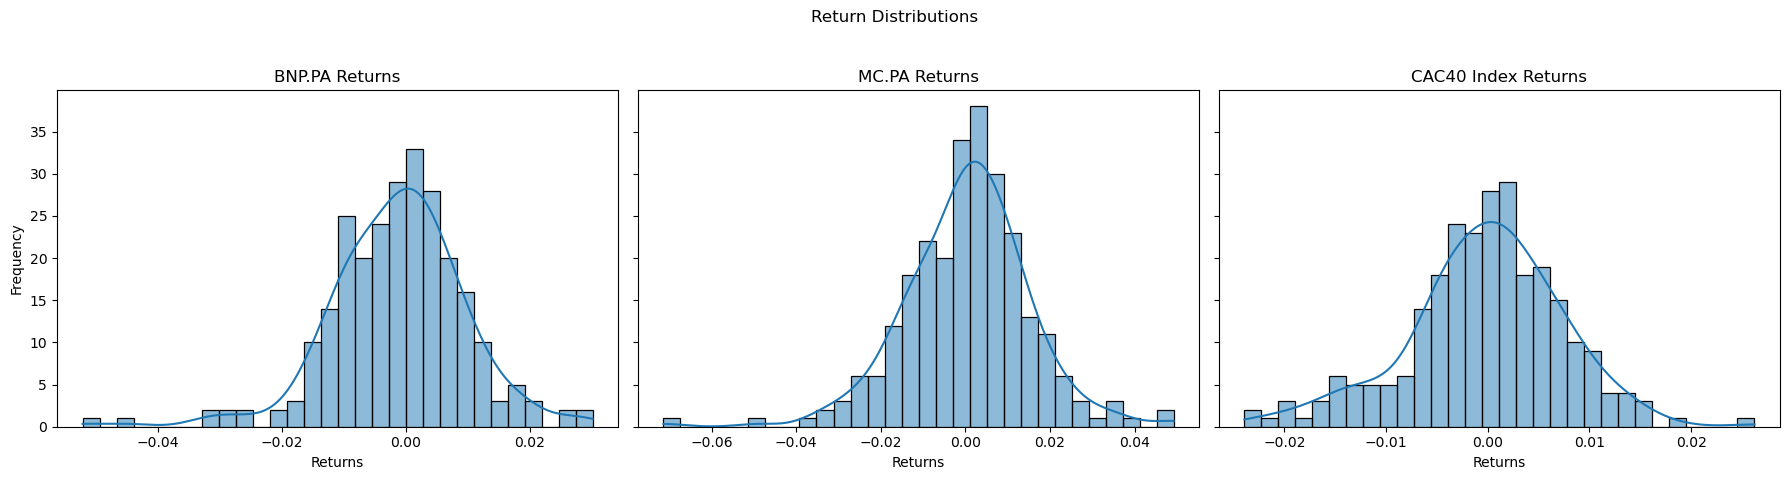

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Kurtosis and Skewness (asymmetry) for the return series
kurtosis_bnppa = returns_df['Return_BNPPA'].kurtosis()
kurtosis_mc = returns_df['Return_MC'].kurtosis()
kurtosis_fchi = returns_df['Return_FCHI'].kurtosis()

skewness_bnppa = returns_df['Return_BNPPA'].skew()
skewness_mc = returns_df['Return_MC'].skew()
skewness_fchi = returns_df['Return_FCHI'].skew()

# Plotting histograms for the return series
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Return Distributions')

# BNP.PA Returns
sns.histplot(returns_df['Return_BNPPA'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('BNP.PA Returns')
axes[0].set_xlabel('Returns')
axes[0].set_ylabel('Frequency')

# MC.PA Returns
sns.histplot(returns_df['Return_MC'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('MC.PA Returns')
axes[1].set_xlabel('Returns')

# CAC40 Index Returns
sns.histplot(returns_df['Return_FCHI'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('CAC40 Index Returns')
axes[2].set_xlabel('Returns')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display Kurtosis and Skewness results
kurtosis_bnppa, kurtosis_mc, kurtosis_fchi, skewness_bnppa, skewness_mc, skewness_fchi


The histograms show the distribution of daily returns for each series, with the Kernel Density Estimate (KDE) providing a smooth estimate of the distribution.
The distributions of BNP.PA and MC.PA show more pronounced tails and a slight leftward skew, suggesting a higher likelihood of negative returns and extreme events.
The CAC40 index's distribution appears more symmetrical and less peaked, indicating a more stable performance with fewer extreme returns compared to the individual stocks.

### 5

In [7]:
# Compute the standard errors of the returns for both stocks for the full period
stderr_bnppa_full = returns_df['Return_BNPPA'].sem()
stderr_mc_full = returns_df['Return_MC'].sem()

# Split the data into 3 sub-periods of equal size
split_indices = np.array_split(returns_df.index, 3)

# Initialize dictionaries to store standard errors for sub-periods
stderr_bnppa_subperiods = {}
stderr_mc_subperiods = {}

# Compute standard errors for each sub-period
for i, indices in enumerate(split_indices, start=1):
    subperiod_df = returns_df.loc[indices]
    stderr_bnppa_subperiods[f'Sub-period {i}'] = subperiod_df['Return_BNPPA'].sem()
    stderr_mc_subperiods[f'Sub-period {i}'] = subperiod_df['Return_MC'].sem()

(stderr_bnppa_full, stderr_mc_full), stderr_bnppa_subperiods, stderr_mc_subperiods


((0.0006799469484016578, 0.0009269683016707831),
 {'Sub-period 1': 0.0011006319586961753,
  'Sub-period 2': 0.0013148914839479452,
  'Sub-period 3': 0.0011086862789760144},
 {'Sub-period 1': 0.001486547955070031,
  'Sub-period 2': 0.001499265972127314,
  'Sub-period 3': 0.0018213525257229897})

### 6

In [8]:
# Compute the correlation between each stock's returns and the CAC40 index returns
correlation_bnppa_fchi = returns_df['Return_BNPPA'].corr(returns_df['Return_FCHI'])
correlation_mc_fchi = returns_df['Return_MC'].corr(returns_df['Return_FCHI'])

correlation_bnppa_fchi, correlation_mc_fchi


(0.61760689545921, 0.7673695471898698)

The strong correlation between MC.PA and the CAC40 compared to BNP.PA and the CAC40 suggests that LVMH's stock performance is more closely aligned with the broader market movements. This could be due to LVMH's diverse global presence and its sensitivity to consumer sentiment, which are also reflected in the overall market performance.

## 7

In [9]:
# Compute the returns of a portfolio with equal weights for both stocks
# The portfolio return is the weighted average of the individual stock returns
portfolio_weights = 0.5  # Equal weights for both stocks
portfolio_returns = (returns_df['Return_BNPPA'] + returns_df['Return_MC']) * portfolio_weights

# Compute the average return of the portfolio over the whole sample period
average_portfolio_return = portfolio_returns.mean()

# Compute the standard deviation of the portfolio returns over the whole sample period
portfolio_std_dev = portfolio_returns.std()

average_portfolio_return, portfolio_std_dev


(-0.0004777770171733216, 0.010350906436513116)

The slight negative average return suggests that, overall, the portfolio experienced a small loss over the sample period. This result can be influenced by various factors, including market conditions, company-specific events, and broader economic trends impacting the financial and luxury goods sectors in which BNP.PA and MC.PA operate.

### 8

In [10]:
# Assume the average return and standard deviation of BNP.PA's returns represent the expected return and volatility
expected_return_bnppa = returns_df['Return_BNPPA'].mean()
volatility_bnppa = returns_df['Return_BNPPA'].std()

# Assume the average of the 5-week interest rate represents the risk-free rate
risk_free_rate = returns_df['Close_IRX'].mean() / 100  # Convert to decimal

# Risk aversion coefficient
A = 1.5

# The optimal allocation to the risky asset (stock) in a portfolio can be calculated as:
# (E(R) - Rf) / (A * σ^2)
# Where E(R) is the expected return of the stock, Rf is the risk-free rate, and σ^2 is the variance of the stock's returns
optimal_allocation_to_stock = (expected_return_bnppa - risk_free_rate) / (A * volatility_bnppa**2)

# Since the total allocation must sum to 1, the allocation to the risk-free asset is:
optimal_allocation_to_risk_free = 1 - optimal_allocation_to_stock

expected_return_bnppa, volatility_bnppa, risk_free_rate, optimal_allocation_to_stock, optimal_allocation_to_risk_free


(-0.0013351798523100536,
 0.010900378806659282,
 0.017220389105058364,
 -104.11177120200287,
 105.11177120200287)

### 9

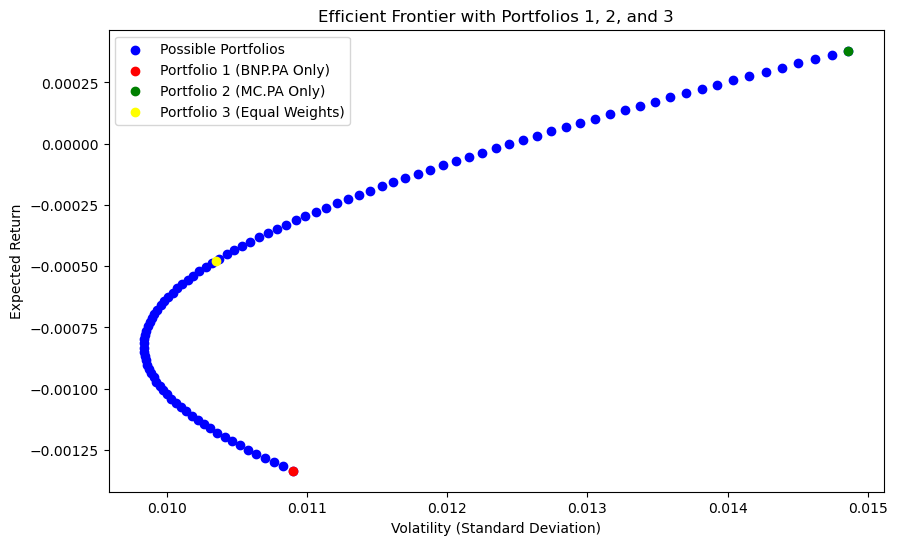

In [11]:
import numpy as np

# Calculate expected returns, volatilities, and correlation for both stocks
expected_return_bnppa = returns_df['Return_BNPPA'].mean()
expected_return_mc = returns_df['Return_MC'].mean()
volatility_bnppa = returns_df['Return_BNPPA'].std()
volatility_mc = returns_df['Return_MC'].std()
correlation = returns_df['Return_BNPPA'].corr(returns_df['Return_MC'])

# Portfolio 3 (Equal Weights): Expected return and volatility
expected_return_p3 = 0.5 * expected_return_bnppa + 0.5 * expected_return_mc
volatility_p3 = np.sqrt((0.5**2 * volatility_bnppa**2) + 
                        (0.5**2 * volatility_mc**2) + 
                        (2 * 0.5 * 0.5 * volatility_bnppa * volatility_mc * correlation))

# Create a range of weights for a combination of the two stocks to plot the efficient frontier
weights = np.linspace(0, 1, 100)

# Initialize lists to hold the expected returns and volatilities of these combinations
portfolio_returns = []
portfolio_volatilities = []

# Calculate expected return and volatility for each combination of weights
for w in weights:
    portfolio_return = w * expected_return_bnppa + (1 - w) * expected_return_mc
    portfolio_volatility = np.sqrt((w**2 * volatility_bnppa**2) + 
                                   ((1 - w)**2 * volatility_mc**2) + 
                                   (2 * w * (1 - w) * volatility_bnppa * volatility_mc * correlation))
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c='blue', label='Possible Portfolios')
plt.scatter(volatility_bnppa, expected_return_bnppa, c='red', label='Portfolio 1 (BNP.PA Only)')
plt.scatter(volatility_mc, expected_return_mc, c='green', label='Portfolio 2 (MC.PA Only)')
plt.scatter(volatility_p3, expected_return_p3, c='yellow', label='Portfolio 3 (Equal Weights)')
plt.title('Efficient Frontier with Portfolios 1, 2, and 3')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()


Portfolio 1 and Portfolio 2 are not on the efficient frontier, indicating inefficiency. These portfolios do not provide the best possible return for their level of risk. Investors could achieve higher returns for the same level of risk by diversifying their holdings, as illustrated by the portfolios represented along the efficient frontier.
Portfolio 3 (Equal Weights) appears closer to the efficient frontier, suggesting it's more efficient than the individual stock portfolios. However, it might still not be on the efficient frontier, implying there are combinations of BNP.PA and MC.PA that could offer a better risk-return trade-off.

### 10

In [12]:
# Calculate the Maximum Drawdown for the equal-weight portfolio
# Maximum Drawdown is calculated as the maximum of the largest peak to trough decline in the portfolio's value
# Ensure portfolio_returns is a Pandas Series for element-wise operations
portfolio_returns_series = pd.Series(portfolio_returns)

# Calculate downside deviation for Sortino Ratio
downside_returns = portfolio_returns_series[portfolio_returns_series < 0]
downside_deviation = downside_returns.std()


# Recalculate annualized portfolio returns and volatility for the equal-weight portfolio
annualized_portfolio_return = (1 + portfolio_returns_series.mean())**252 - 1  # Annualize the mean return
annualized_portfolio_volatility = portfolio_returns_series.std() * np.sqrt(252)  # Annualize the volatility

# Redefine the risk-free rate based on the previously mentioned average 5-week interest rate from the US Treasury
# Note: This is a simplified assumption for demonstration purposes
risk_free_rate_annualized = 0.017220389105058364 * 252  # Convert to annualized rate assuming 252 trading days per year

# Recalculate the Sharpe Ratio with all variables defined
sharpe_ratio = (annualized_portfolio_return - risk_free_rate_annualized) / annualized_portfolio_volatility

# Recalculate the Sortino Ratio with all variables defined
sortino_ratio = (annualized_portfolio_return - risk_free_rate_annualized) / downside_deviation





# Calculate the cumulative returns for the portfolio
cumulative_returns = (1 + portfolio_returns_series).cumprod()

# Calculate the running maximum of the cumulative returns to represent the peak
running_max = cumulative_returns.cummax()

# Calculate drawdowns as the difference between the running max and the cumulative returns
drawdowns = running_max - cumulative_returns

# Calculate the maximum drawdown
max_drawdown = drawdowns.max()

# Recompute the Sterling Ratio with the correct max_drawdown
sterling_ratio = (annualized_portfolio_return - risk_free_rate_annualized) / max_drawdown

# Display the recalculated ratios
sharpe_ratio, sortino_ratio, sterling_ratio


(-558.2161737808367, -11344.948425130624, -87.2510836360376)

The Sharpe Ratio accounts for the total volatility (both upside and downside) of the portfolio's returns. Its negative value in this case indicates that the portfolio underperformed the risk-free rate significantly, considering all volatility.

The Sortino Ratio focuses only on downside volatility, making it more relevant for investors who are concerned about downside risk. The more negative Sortino ratio compared to the Sharpe ratio suggests that the downside volatility is particularly high.

The Sterling Ratio uses the maximum drawdown as a measure of risk, which differs from the volatility-based measures used in the Sharpe and Sortino ratios. The negative value here indicates large drawdowns, further emphasizing the portfolio's risk.

### 11

In [13]:
from scipy.stats import norm

# Empirical VaR at 1%
empirical_var_1 = np.percentile(portfolio_returns_series, 1)

# Parametric VaR at 1% using the normal distribution
parametric_var_1 = norm.ppf(0.01, loc=annualized_portfolio_return, scale=annualized_portfolio_volatility)

empirical_var_1, parametric_var_1


(-0.001318031795607319, -0.13201732175159964)

The difference between the empirical VaR and the parametric VaR highlights the importance of the underlying assumptions in risk measurement. The empirical VaR is based on actual historical data and does not assume any specific distribution, making it potentially more accurate for portfolios with non-normal return distributions. On the other hand, the parametric VaR assumes returns are normally distributed, which can simplify calculations but might not accurately capture the risk if the actual returns are skewed or have fat tails.

### 12

In [14]:
# Resample the portfolio returns 1000 times with replacement to generate a simulated dataset
np.random.seed(42)  # For reproducibility
simulated_returns = np.random.choice(portfolio_returns_series, size=1000, replace=True)

# Compute the 1% VaR on the simulated dataset
var_1_resampled = np.percentile(simulated_returns, 1)

var_1_resampled


-0.001317858582913352

The VaR value obtained from resampling is quite similar to the empirical VaR calculated earlier. This similarity suggests that the resampling method is able to capture the risk characteristics of the original dataset effectively. Resampling, as a non-parametric approach, does not assume a specific distribution of returns and relies on the actual historical data to estimate risk metrics like VaR.

## Question 4

In [15]:
import numpy as np

# Calculate moving averages
short_window = 10
long_window = 50

bnppa_df['Short_MA'] = bnppa_df['Adj Close'].rolling(window=short_window, min_periods=1).mean()
bnppa_df['Long_MA'] = bnppa_df['Adj Close'].rolling(window=long_window, min_periods=1).mean()

# Generate signals
bnppa_df['Signal'] = 0
bnppa_df['Signal'][short_window:] = np.where(bnppa_df['Short_MA'][short_window:] > bnppa_df['Long_MA'][short_window:], 1, -1)

# Calculate daily returns
bnppa_df['Market Returns'] = bnppa_df['Adj Close'].pct_change()
bnppa_df['Strategy Returns'] = bnppa_df['Market Returns'] * bnppa_df['Signal'].shift(1)

# Calculate cumulative returns
bnppa_df['Cumulative Market Returns'] = (1 + bnppa_df['Market Returns']).cumprod()
bnppa_df['Cumulative Strategy Returns'] = (1 + bnppa_df['Strategy Returns']).cumprod()

# Display the tail of the dataset to show the signals and cumulative returns
bnppa_df_tail = bnppa_df.tail()

bnppa_df_tail[['Date', 'Adj Close', 'Short_MA', 'Long_MA', 'Signal', 'Cumulative Market Returns', 'Cumulative Strategy Returns']]


C:\Users\PC2\AppData\Local\Temp\ipykernel_30780\2553484083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnppa_df['Signal'][short_window:] = np.where(bnppa_df['Short_MA'][short_window:] > bnppa_df['Long_MA'][short_window:], 1, -1)


,Date,Adj Close,Short_MA,Long_MA,Signal,Cumulative Market Returns,Cumulative Strategy Returns
250,2018-10-17,49.599998,50.6925,51.8029,-1,0.769149,0.748986
251,2018-10-18,49.224998,50.3850,51.7038,-1,0.763334,0.754648
252,2018-10-19,48.724998,50.0725,51.6271,-1,0.755581,0.762314
253,2018-10-22,48.305000,49.7880,51.5530,-1,0.749068,0.768885
254,2018-10-23,47.560001,49.4210,51.4670,-1,0.737515,0.780743


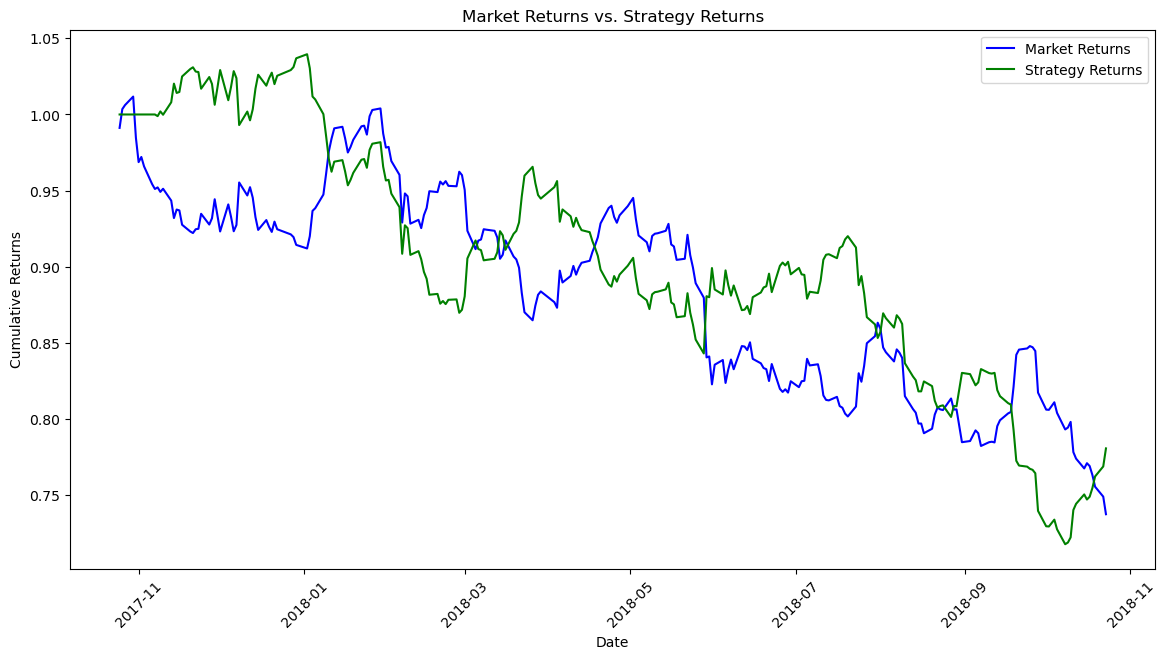

In [17]:
import matplotlib.pyplot as plt

# Plot Cumulative Market Returns vs. Cumulative Strategy Returns
plt.figure(figsize=(14, 7))
plt.plot(bnppa_df['Date'], bnppa_df['Cumulative Market Returns'], label='Market Returns', color='blue')
plt.plot(bnppa_df['Date'], bnppa_df['Cumulative Strategy Returns'], label='Strategy Returns', color='green')
plt.title('Market Returns vs. Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\PC2\AppData\Local\Temp\ipykernel_30780\1697157877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_df['Signal'][short_window:] = np.where(mc_df['Short_MA'][short_window:] > mc_df['Long_MA'][short_window:], 1, -1)


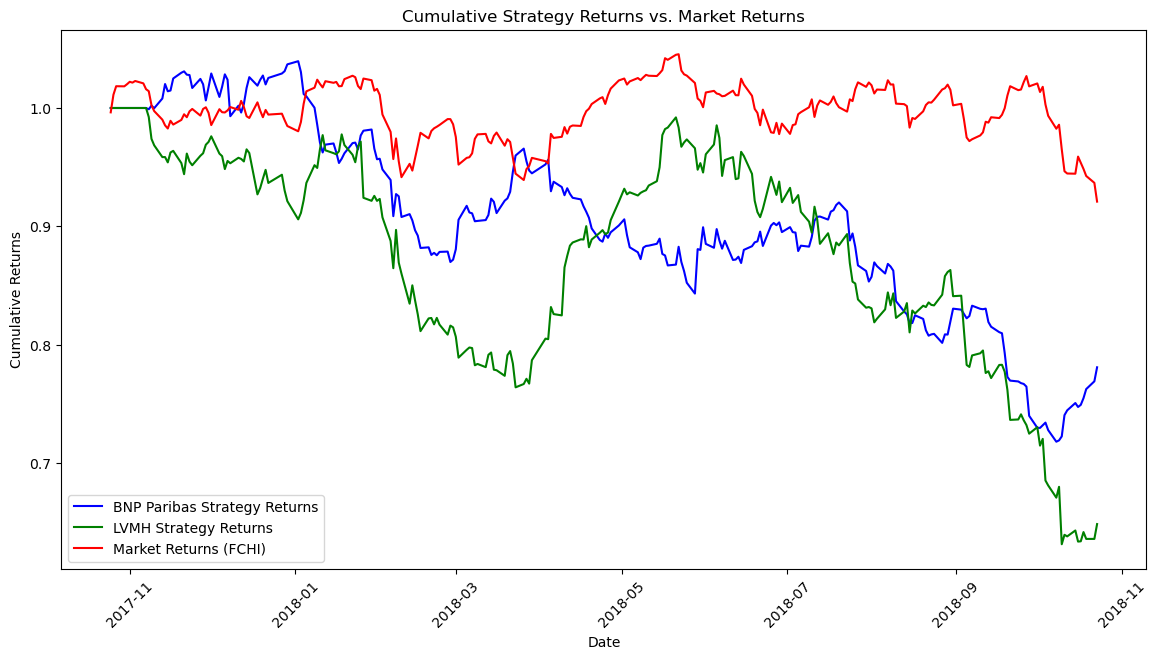

In [16]:
# Implement the moving average crossover strategy for LVMH
mc_df['Short_MA'] = mc_df['Adj Close'].rolling(window=short_window, min_periods=1).mean()
mc_df['Long_MA'] = mc_df['Adj Close'].rolling(window=long_window, min_periods=1).mean()

mc_df['Signal'] = 0
mc_df['Signal'][short_window:] = np.where(mc_df['Short_MA'][short_window:] > mc_df['Long_MA'][short_window:], 1, -1)

mc_df['Market Returns'] = mc_df['Adj Close'].pct_change()
mc_df['Strategy Returns'] = mc_df['Market Returns'] * mc_df['Signal'].shift(1)

mc_df['Cumulative Market Returns'] = (1 + mc_df['Market Returns']).cumprod()
mc_df['Cumulative Strategy Returns'] = (1 + mc_df['Strategy Returns']).cumprod()

# Prepare the market benchmark (French Stock Market Index)
fchi_df['Market Returns'] = fchi_df['Adj Close'].pct_change()
fchi_df['Cumulative Market Returns'] = (1 + fchi_df['Market Returns']).cumprod()

# Plot Cumulative Returns for BNP Paribas, LVMH, and French Stock Market Index
plt.figure(figsize=(14, 7))
plt.plot(bnppa_df['Date'], bnppa_df['Cumulative Strategy Returns'], label='BNP Paribas Strategy Returns', color='blue')
plt.plot(mc_df['Date'], mc_df['Cumulative Strategy Returns'], label='LVMH Strategy Returns', color='green')
plt.plot(fchi_df['Date'], fchi_df['Cumulative Market Returns'], label='Market Returns (FCHI)', color='red')
plt.title('Cumulative Strategy Returns vs. Market Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.xticks(rotation=45)
plt.show()
